In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
#For Preprocessing
import re    # RegEx for removing non-letter characters

pio.renderers.default = 'png'


# For Preprocessing
import re  # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

# For data visualization
import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

# load all_twitter dataset
data1 = pd.read_csv("C:\Users\HP\Downloads\amazon_alexa_data.csv")
data1 = pd.DataFrame(data1)

# Load Tweet dataset
data1.isnull()
# data1.dropna(axis=0, inplace=True)

print(data1.head())

print(data1.columns)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-6-67eb4ea11d11>, line 31)

# EDA and Analysis

In [ ]:

df = data1

print(df.head(10))
print("\n\nDataset Desciption: ")
print(df.describe())
print("\n\nDataset Info: ")
print(df.info())

print(df.shape)

print("\n\nNull Values Count",df.isnull().sum())

   rating       date             variation  \
0       5  31-Jul-18      Charcoal Fabric    
1       5  31-Jul-18      Charcoal Fabric    
2       4  31-Jul-18        Walnut Finish    
3       5  31-Jul-18      Charcoal Fabric    
4       5  31-Jul-18      Charcoal Fabric    
5       5  31-Jul-18  Heather Gray Fabric    
6       3  31-Jul-18     Sandstone Fabric    
7       5  31-Jul-18      Charcoal Fabric    
8       5  30-Jul-18  Heather Gray Fabric    
9       5  30-Jul-18  Heather Gray Fabric    

                                    verified_reviews  feedback  
0  Despite the fact that I have only played a sma...         1  
1  I bought this charger in Jul 1003 and it worke...         0  
2  Check out Maha Energy's website. Their Powerex...         1  
3  Reviewed quite a bit of the combo players and ...         1  
4  I also began having the incorrect disc problem...         0  
5  I love the style of this, but after a couple y...         0  
6  I cannot scroll through a DVD menu 

# Data Visualization

C:\Users\YK\AppData\Local\Temp\ipykernel_12732\63575376.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



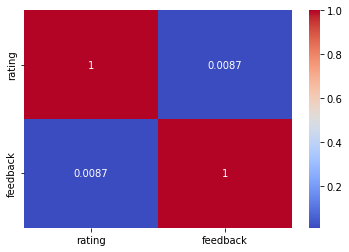

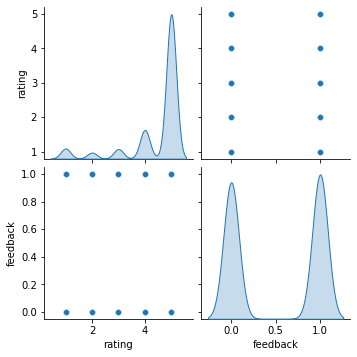

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Plot pair plots for selected columns
sns.pairplot(df, diag_kind='kde')
plt.show()


In [ ]:
# Summary of key insights
summary = {
    'total_rows': df.shape[0],
    'total_columns': df.shape[1],
    'missing_values': df.isnull().sum().to_dict(),
    'data_types': df.dtypes.to_dict(),
    'statistical_summary': df.describe().to_dict()
}
print(summary)


{'total_rows': 6300, 'total_columns': 5, 'missing_values': {'rating': 0, 'date': 0, 'variation': 0, 'verified_reviews': 0, 'feedback': 0}, 'data_types': {'rating': dtype('int64'), 'date': dtype('O'), 'variation': dtype('O'), 'verified_reviews': dtype('O'), 'feedback': dtype('int64')}, 'statistical_summary': {'rating': {'count': 6300.0, 'mean': 4.463174603174603, 'std': 1.0684210298627346, 'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 5.0, 'max': 5.0}, 'feedback': {'count': 6300.0, 'mean': 0.513968253968254, 'std': 0.4998445215719408, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 1.0, 'max': 1.0}}}


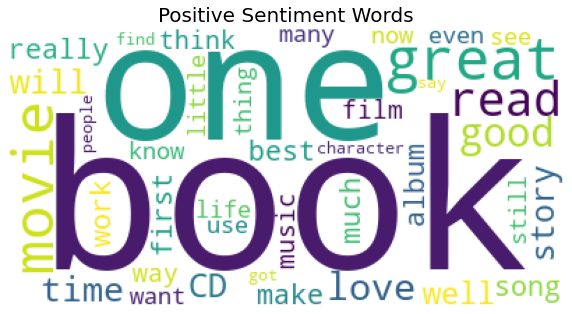

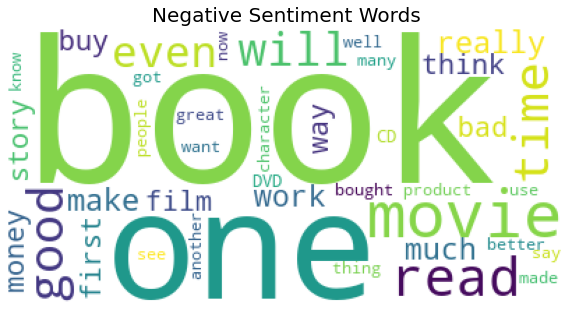

In [ ]:

from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, feedback):

    # Combine all tweets
    combined_text = " ".join([i for i in df[df.feedback==feedback]['verified_reviews']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=40,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    if feedback==1:
        plt.figure(figsize=(10,10))
        plt.imshow(wc.generate(combined_text))
        feedback = "Positive"
        plt.title('{} Sentiment Words'.format(feedback), fontsize=20)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(wc.generate(combined_text))
        feedback = "Negative"
        plt.title('{} Sentiment Words'.format(feedback), fontsize=20)
        plt.axis('off')
        plt.show()


# Positive tweet words
wordcount_gen(df,1)

# Negative tweet words
wordcount_gen(df,0)



In [ ]:

def text_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words

print("\nOriginal text ->", df['verified_reviews'][0])
print("\nProcessed text ->", text_to_words(df['verified_reviews'][0]))



Original text -> Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.

Processed text -> ['despit', 'fact', 'play', 'small', 'portion', 'game', 'music', 'heard', 'plu', 'connect', 'chrono', 'trigger', 'great', 'well', 'led', 'purchas', 'soundtrack', 'remain', 'one', 'favorit', 'album', 'incred', 'mix', 'fun'

In [ ]:

# Apply data processing to each tweet
x = list(map(text_to_words, df['verified_reviews']))
from sklearn.preprocessing import LabelEncoder

# Encode target labels
y = pd.get_dummies(df['verified_reviews'])
print(x[0])


['despit', 'fact', 'play', 'small', 'portion', 'game', 'music', 'heard', 'plu', 'connect', 'chrono', 'trigger', 'great', 'well', 'led', 'purchas', 'soundtrack', 'remain', 'one', 'favorit', 'album', 'incred', 'mix', 'fun', 'epic', 'emot', 'song', 'sad', 'beauti', 'track', 'especi', 'like', 'mani', 'kind', 'song', 'video', 'game', 'soundtrack', 'must', 'admit', 'one', 'song', 'life', 'distant', 'promis', 'brought', 'tear', 'eye', 'mani', 'occas', 'one', 'complaint', 'soundtrack', 'use', 'guitar', 'fret', 'effect', 'mani', 'song', 'find', 'distract', 'even', 'includ', 'would', 'still', 'consid', 'collect', 'worth']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.70,test_size=0.30, random_state=1)

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()
#import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
#X_train = pr.normalize(X_train, axis=1)
#X_test  = pr.normalize(X_test, axis=1)
# print first 200 words/tokens
print(count_vector.get_feature_names_out()[0:200])


c:\Users\YK\anaconda3\envs\pyt\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



['0' '00' '000' '0000' '00000' '0080p' '00th' '01' '03' '0367' '0369' '04'
 '05' '06' '060' '0600' '07' '08' '08th' '09' '091' '0930' '0940' '0948'
 '0950' '0954' '0963' '0964' '0968' '0970' '0973' '0979' '0980' '0984'
 '0985' '0988' '0990' '0991' '0993' '0994' '0996' '09th' '0st' '1' '10'
 '100' '1000' '1001' '1003' '1005' '1006' '1007' '1008' '1009' '10st'
 '10th' '11' '13' '14' '15' '150' '16' '17' '1nd' '3' '30' '300' '33' '35'
 '36' '360' '3d' '3rd' '4' '40' '400' '41' '45' '450' '48' '4th' '5' '50'
 '500' '6' '60' '670' '6th' '7' '70' '700' '75' '7th' '8' '80' '85' '88'
 '9' '90' '94' '95' '98' '99' '9th' 'aa' 'abel' 'abil' 'abl' 'abound'
 'abraham' 'abridg' 'absolut' 'absorb' 'absurd' 'abus' 'ac' 'academ'
 'academi' 'accept' 'access' 'accessori' 'accid' 'accident' 'accompani'
 'accomplish' 'accord' 'account' 'accur' 'accuraci' 'accus' 'ace' 'ach'
 'achiev' 'ackroyd' 'acoust' 'across' 'act' 'action' 'activ' 'actor'
 'actress' 'actual' 'ad' 'adam' 'adapt' 'adaptor' 'add' 'adder' '

In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['verified_reviews'][0])
X, tokenizer = tokenize_pad_sequences(df['verified_reviews'])
print('After Tokenization & Padding \n', x[0])

import pickle

# saving
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer1.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

y = pd.get_dummies(df['feedback'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)



Before Tokenization & Padding 
 Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.
After Tokenization & Padding 
 ['despit', 'fact', 'play', 'small', 'portion', 'game', 'music', 'heard', 'plu', 'connect', 'chrono', 'trigger', 'great', 'well', 'led', 'purchas', 'soundtrack', 'remain', 'one', 'favorit', 'albu

# Bidirectional LSTM

In [ ]:
import keras.backend as K


def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,Flatten,RNN
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(32)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)
plt.show()
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate model on the test set
loss, bilstm_accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(bilstm_accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 64)

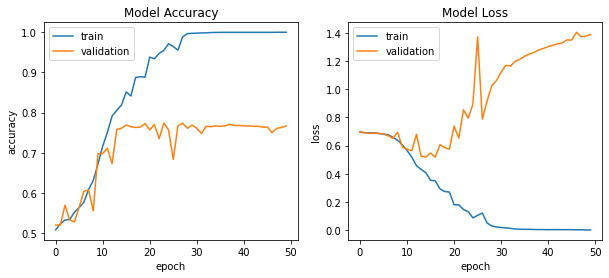

In [ ]:

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')


plot_training_hist(history)



40/40 [==============================] - 1s 4ms/step
Best model saved


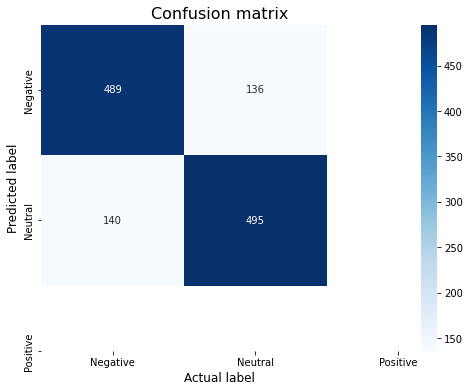

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
model.save('bilstm_model.h5')
print('Best model saved')



In [ ]:
from keras.models import load_model

# Load model
model = load_model('bilstm_model.h5')


def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Positive']
    max_len = 50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    print(yt)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])


predict_class(['the worst purchase ever i did, stopped working in few days '])

predict_class(['A Nice product'])

predict_class(['Awsome product to use and very satisfied and like'])



1/1 [==============================] - 1s 949ms/step
[0]
The predicted sentiment is Negative
1/1 [==============================] - 0s 29ms/step
[1]
The predicted sentiment is Positive
1/1 [==============================] - 0s 24ms/step
[1]
The predicted sentiment is Positive


# RNN


In [ ]:
import keras.backend as K


def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,Flatten,SimpleRNN
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=25
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(SimpleRNN(12))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)
plt.show()
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate model on the test set
loss, rnn_accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(rnn_accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 simple_rnn (SimpleRNN)      (None, 12)                540       
                                                                 
 flatten_1 (Flatten)         (None, 12)                0         
                                     

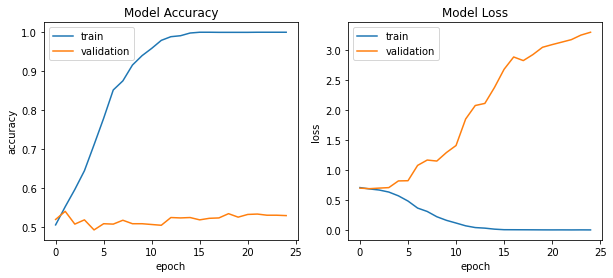

In [ ]:

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')


plot_training_hist(history)



40/40 [==============================] - 0s 3ms/step
Best model saved


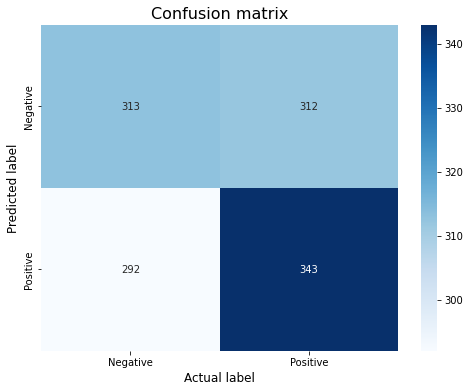

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
model.save('rnn_model.h5')
print('Best model saved')



# LSTM

In [ ]:
import keras.backend as K


def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout,Flatten, LSTM
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=25
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(12))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)
plt.show()
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate model on the test set
loss, lstm_accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(lstm_accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 12)                2160      
                                                                 
 flatten_2 (Flatten)         (None, 12)                0         
                                     

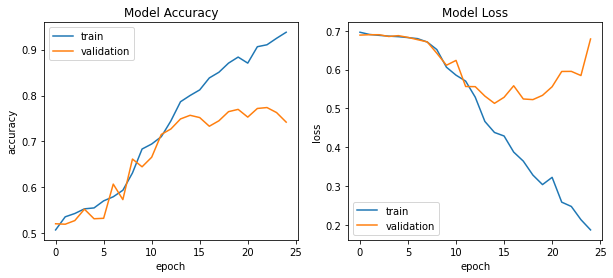

In [ ]:

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')


plot_training_hist(history)



40/40 [==============================] - 1s 3ms/step
Best model saved


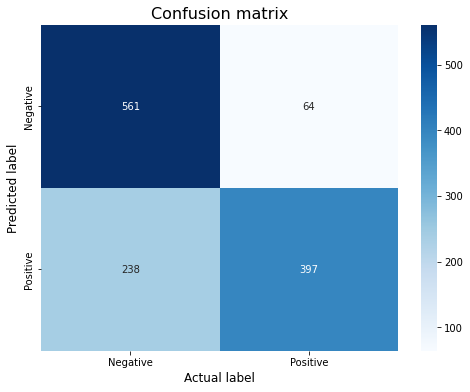

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
model.save('lstm_model.h5')
print('Best model saved')


# CNN

In [ ]:
import keras.backend as K
import tensorflow as tf


def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout,Flatten, LSTM
from keras.metrics import Precision, Recall
from keras.optimizers import SGD, adam
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=25
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)
plt.show()
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate model on the test set
loss, cnn_accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(cnn_accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 384)               0         
                                                                 
 dropout_3 (Dropout)         (None, 384)               0         
                                     

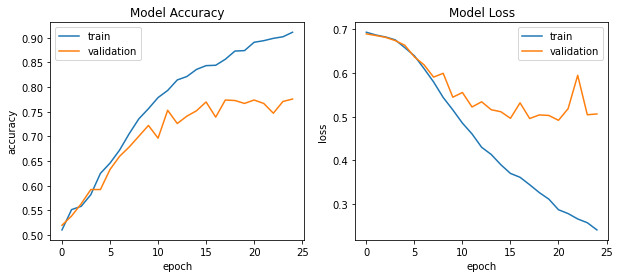

In [ ]:

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')


plot_training_hist(history)



40/40 [==============================] - 0s 2ms/step
Best model saved


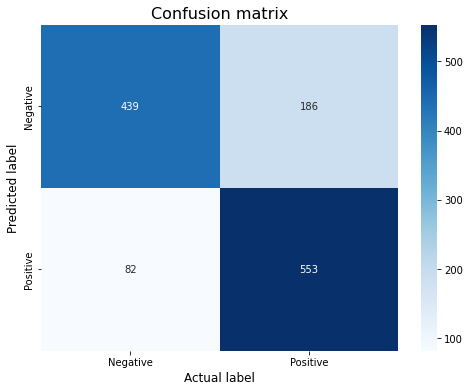

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
model.save('cnn_model.h5')
print('Best model saved')


C:\Users\YK\AppData\Local\Temp\ipykernel_12732\3607266116.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




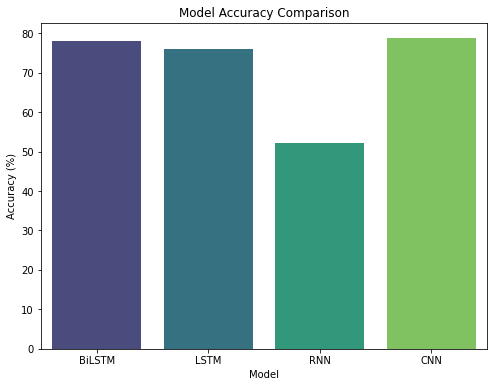

In [ ]:
acc_level = [bilstm_accuracy,lstm_accuracy,rnn_accuracy,cnn_accuracy]
models = ['BiLSTM','LSTM','RNN','CNN']

scaled_acc_level = [acc * 100 for acc in acc_level]

import seaborn as sns
data = pd.DataFrame({'Model': models[:], 'Accuracy': scaled_acc_level[:]})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Show the plot
plt.show()